# Data Preprocessing

In [ ]:
import pandas as pd 

In [ ]:
data = pd.read_csv(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\2. data_cleaning\cleaned_data.csv')
data.sample(3)

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string 
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
def transform_text(text):
    translator = str.maketrans('', '', string.punctuation)
    ps = PorterStemmer()

    text = text.lower()
    text = nltk.word_tokenize(text)
    clean_text=[]
    for word in text:
        if word not in stopwords.words('english'):
            word = word.translate(translator)
            if word.isalnum():
                clean_text.append(ps.stem(word))
    return ' '.join(clean_text)

In [ ]:
transform_text("sarvesh's dragon is playing game!")

'sarvesh s dragon play game'

In [ ]:
data['clean_mail'] = data['mail'].apply(transform_text)
data = data[['mail', 'clean_mail', 'num_characters', 'num_words', 'num_sentences', 'ham_or_spam']]
data.head()

,mail,clean_mail,num_characters,num_words,num_sentences,ham_or_spam
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,24,2,0
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,8,2,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2,1
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,13,1,0
4,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though,61,15,1,0


In [ ]:
data['clean_mail'].iloc[4]

'nah nt think goe usf live around though'

In [ ]:
data.sample(5)

,mail,clean_mail,num_characters,num_words,num_sentences,ham_or_spam
3574,And do you have any one that can teach me how ...,one teach ship car,59,15,1,0
1352,Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur S...,let ur heart ur compass ur mind ur map ur soul...,121,27,1,0
1994,Have you been practising your curtsey?,practis curtsey,38,7,1,0
5557,No. I meant the calculation is the same. That ...,meant calcul lt gt unit lt gt school realli ex...,273,67,7,0
734,Leaving to qatar tonite in search of an opport...,leav qatar tonit search opportunityal went fas...,103,17,1,0


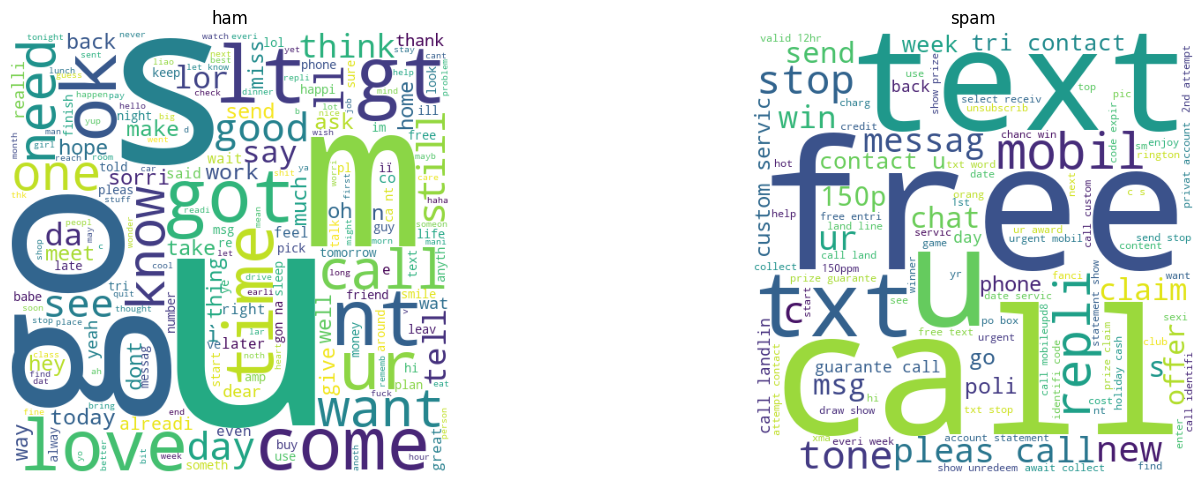

In [ ]:
from wordcloud import WordCloud

wc1 = WordCloud(height=500, width=500, min_font_size=10, background_color='white')
wc2 = WordCloud(height=500, width=500, min_font_size=10, background_color='white')
ham_wc = wc1.generate(data[data['ham_or_spam']==0]['clean_mail'].str.cat(sep=' '))
spam_wc = wc2.generate(data[data['ham_or_spam']==1]['clean_mail'].str.cat(sep=' '))

figure, axis = plt.subplots(1, 2, figsize=(15,5))
plt.tight_layout()
axis[0].imshow(ham_wc)
axis[0].axis("off")
axis[0].set_title("ham")


axis[1].imshow(spam_wc)
axis[1].axis("off")
axis[1].set_title("spam")
plt.show()

Series([], Name: clean_mail, dtype: object)

In [ ]:
spam_corpus = []
for msg in data[data['ham_or_spam'] == 1]['clean_mail'].to_list():
    for word in msg.split():
        # if word not in spam_corpus:
        spam_corpus.append(word)

len(spam_corpus), spam_corpus

(10775,
 ['free',
  'entri',
  '2',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receiv',
  'entri',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  's',
  'appli',
  '08452810075over18',
  's',
  'freemsg',
  'hey',
  'darl',
  's',
  '3',
  'week',
  's',
  'word',
  'back',
  'd',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  'rcv',
  'winner',
  'valu',
  'network',
  'custom',
  'select',
  'receivea',
  'prize',
  'reward',
  'claim',
  'call',
  '09061701461',
  'claim',
  'code',
  'kl341',
  'valid',
  '12',
  'hour',
  'mobil',
  '11',
  'month',
  'u',
  'r',
  'entitl',
  'updat',
  'latest',
  'colour',
  'mobil',
  'camera',
  'free',
  'call',
  'mobil',
  'updat',
  'co',
  'free',
  '08002986030',
  'six',
  'chanc',
  'win',
  'cash',
  '100',
  '20000',
  'pound',
  'txt',
  'csh11',
  'send',
  '87575',
  'cost',
  '150pday',
  '6day',
  '16',


In [ ]:
pd.DataFrame(Counter(spam_corpus).most_common(25))

,0,1
0,call,321
1,free,191
2,2,157
3,txt,141
4,u,135
5,text,122
6,ur,119
7,mobil,114
8,stop,106
9,repli,103


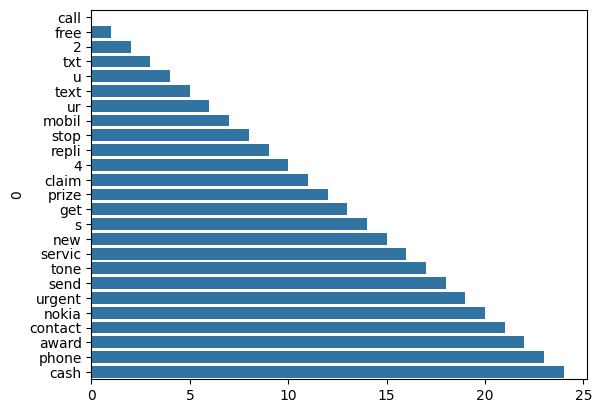

In [ ]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(25))[0])
plt.show()

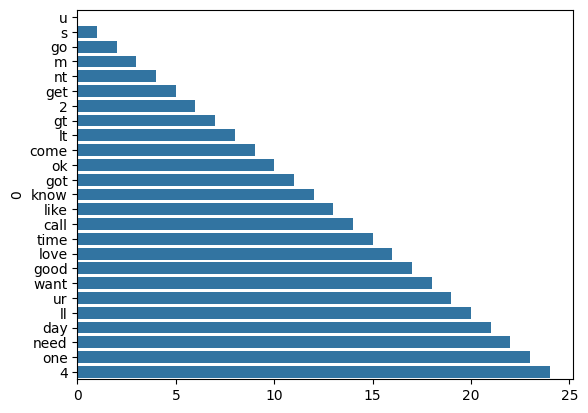

In [ ]:
ham_corpus = []
for msg in data[data['ham_or_spam'] == 0]['clean_mail'].to_list():
    for word in msg.split():
        # if word not in spam_corpus:
        ham_corpus.append(word)

len(ham_corpus), ham_corpus

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(25))[0])
plt.show()

In [ ]:
data.to_csv(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\2. data_cleaning\cleaned_data.csv')